In [9]:
!kaggle datasets download -d tongpython/cat-and-dog

 96% 210M/218M [00:02<00:00, 83.2MB/s]
100% 218M/218M [00:02<00:00, 105MB/s] 


In [0]:
import zipfile

local_zip = 'cat-and-dog.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('cat-and-dog')
zip_ref.close()

In [2]:
import warnings
warnings.filterwarnings(action='ignore')
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten,BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
TRAIN_DIR = '/content/cat-and-dog/training_set/training_set'
VALID_DIR = '/content/cat-and-dog/test_set/test_set'

In [4]:
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150
TRAIN_DATA_GEN = ImageDataGenerator(rescale=1.0/255.0,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,height_shift_range=0.1,width_shift_range=0.1,rotation_range=30).flow_from_directory(TRAIN_DIR,color_mode='grayscale',target_size=(IMAGE_WIDTH,IMAGE_HEIGHT),batch_size=64)
VALID_DATA_GEN = ImageDataGenerator(rescale=1.0/255.0).flow_from_directory(VALID_DIR,color_mode='grayscale',target_size=(IMAGE_WIDTH,IMAGE_HEIGHT),batch_size=64)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


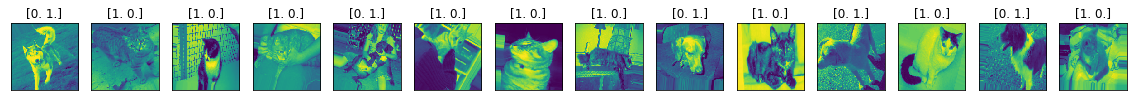

In [5]:
first_batch = TRAIN_DATA_GEN.next()
i = 0
_,ax = plt.subplots(1,14,figsize=(20,2))
for image,label in zip(first_batch[0][:14],first_batch[1][:14]):
  ax[i].imshow(image.reshape(IMAGE_WIDTH,IMAGE_HEIGHT))
  ax[i].set_title(str(label))
  ax[i].set_xticks([])
  ax[i].set_yticks([])
  i+=1

In [0]:
def base_model():
    model = Sequential()
    model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu',padding='same'))
    model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu',padding='same'))
    model.add(MaxPool2D(strides=(2,2)))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPool2D(strides=(2,2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPool2D(strides=(2,2)))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPool2D(strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2,activation='softmax'))
    return model

In [11]:
model = base_model()
model.compile(loss=categorical_crossentropy,optimizer = Adam(lr=0.0003),metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 73, 73, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 35, 35, 64)       

In [0]:
early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [13]:
history = model.fit_generator(TRAIN_DATA_GEN,steps_per_epoch=TRAIN_DATA_GEN.n//TRAIN_DATA_GEN.batch_size,epochs=100,validation_data=VALID_DATA_GEN,validation_steps=VALID_DATA_GEN.n//VALID_DATA_GEN.batch_size,shuffle=True,callbacks=[early_stopping])

Epoch 1/100
125/125 [==============================] - 54s 429ms/step - loss: 0.6907 - acc: 0.5259 - val_loss: 0.6775 - val_acc: 0.5968
Epoch 2/100
125/125 [==============================] - 53s 424ms/step - loss: 0.6802 - acc: 0.5614 - val_loss: 0.6594 - val_acc: 0.6243
Epoch 3/100
125/125 [==============================] - 53s 424ms/step - loss: 0.6679 - acc: 0.5907 - val_loss: 0.6440 - val_acc: 0.6120
Epoch 4/100
125/125 [==============================] - 53s 423ms/step - loss: 0.6486 - acc: 0.6245 - val_loss: 0.6112 - val_acc: 0.6687
Epoch 5/100
125/125 [==============================] - 53s 425ms/step - loss: 0.6212 - acc: 0.6511 - val_loss: 0.6126 - val_acc: 0.6728
Epoch 6/100
125/125 [==============================] - 54s 428ms/step - loss: 0.6164 - acc: 0.6585 - val_loss: 0.6069 - val_acc: 0.6789
Epoch 7/100
125/125 [==============================] - 53s 424ms/step - loss: 0.5950 - acc: 0.6811 - val_loss: 0.6086 - val_acc: 0.6396
Epoch 8/100
125/125 [===========================

Text(0.5, 1.0, 'Accuracy')

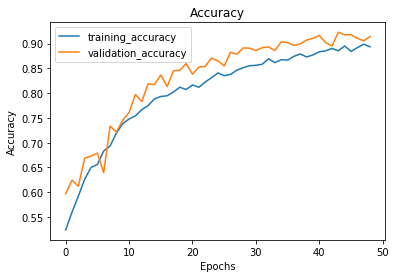

In [14]:
plt.plot(history.history['acc'],label='training_accuracy')
plt.plot(history.history['val_acc'],label='validation_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy")

Text(0.5, 1.0, 'Loss')

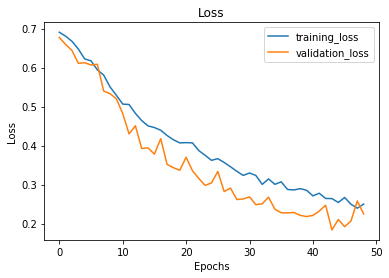

In [15]:
plt.plot(history.history['loss'],label='training_loss')
plt.plot(history.history['val_loss'],label='validation_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss")

In [16]:
loss_,acc_ = model.evaluate_generator(VALID_DATA_GEN,VALID_DATA_GEN.n//VALID_DATA_GEN.batch_size)
print("Loss:",loss_)
print("Accuracy:",acc_)

Loss: 0.2032337061339809
Accuracy: 0.9178427419354839


In [0]:
model.save("Cats_Vs_Dogs_CustomModel_Acc_91.h5")